In [3]:
import pandas as pd 
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import seaborn as sns            # Matplotlib을 기반으로 한 데이터 시각화 라이브러리
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from matplotlib import font_manager, rc  # 폰트 에러 해결을 위한 모듈

font_path = "./krfont.ttf"  # 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)  # 한글 폰트 설정

In [4]:
# pandas를 사용하여 CSV 파일을 읽어옵니다.
df = pd.read_csv('./HepatitisCdata.csv', index_col=0)

# 'Category' 열의 값을 매핑하여 감염 여부를 1(감염자) 또는 0(감염자가 아닌 사람)으로 변환합니다.
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, \
                                     "1=Hepatitis": 1, "2=Fibrosis": 1, "3=Cirrhosis": 1})

# 'Sex' 열의 값을 매핑하여 'm'을 1, 'f'를 0으로 변환합니다.
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

# 결측값(NaN)을 각 열의 평균값으로 채웁니다.
df.fillna(df.mean(), inplace=True)

# 'Category' 열을 기준으로 그룹화합니다.
grouped_df = df.groupby('Category')

# 그룹별로 데이터를 출력합니다.
for key, group in grouped_df:
    if key == 0:
        print('=> Key : non-infectee <=')
    else:
        print('=> Key : infectee <=')
    print('> Count :', len(group))
    print(group.head(), '\n')


=> Key : non-infectee <=
> Count : 540
   Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
1         0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
2         0   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
3         0   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
4         0   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
5         0   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
1  69.0  
2  76.5  
3  79.3  
4  75.7  
5  68.7   

=> Key : infectee <=
> Count : 75
     Category  Age  Sex   ALB       ALP        ALT    AST   BIL   CHE  CHOL  \
541         1   38    1  45.0  56.30000  28.450814   33.1   7.0  9.58  6.00   
542         1   19    1  41.0  68.28392  87.000000   67.0  12.0  7.55  3.90   
543         1   23    1  47.0  19.10000  38.900000  164.2  17.0  7.09  3.20   
544         1   25    1  42.0  38.20000  63.300000  187.7  14.

In [5]:
for key, group in grouped_df:  # 'Category' 열을 기준으로 데이터를 그룹화하여 순환합니다.
    if key == 0:  # 'Category' 값이 0인 경우
        print('=> Key : non-infectee <=')  # 'non-infectee' 그룹임을 출력합니다.
    else:  # 'Category' 값이 0이 아닌 경우
        print('=> Key : infectee <=')  # 'infectee' 그룹임을 출력합니다.
    
    print('> Mean :\n', group.mean(), '\n')  # 각 그룹의 열별 평균값을 출력합니다.
    print('> Median :\n', group.median(), '\n')  # 각 그룹의 열별 중앙값을 출력합니다.
    print('> Variance :\n', group.var(), '\n')  # 각 그룹의 열별 분산을 출력합니다.
    print('> Standard Deviation :\n', group.std(), '\n')  # 각 그룹의 열별 표준 편차를 출력합니다.

=> Key : non-infectee <=
> Mean :
 Category     0.000000
Age         47.266667
Sex          0.600000
ALB         42.007037
ALP         68.869815
ALT         27.610000
AST         27.125370
BIL          8.477778
CHE          8.386185
CHOL         5.479161
CREA        78.753704
GGT         30.624444
PROT        71.875370
dtype: float64 

> Median :
 Category     0.000
Age         47.000
Sex          1.000
ALB         42.100
ALP         66.950
ALT         23.150
AST         24.900
BIL          6.900
CHE          8.325
CHOL         5.370
CREA        78.000
GGT         21.500
PROT        72.100
dtype: float64 

> Variance :
 Category      0.000000
Age          94.173655
Sex           0.240445
ALB          30.340173
ALP         378.409384
ALT         440.445429
AST         168.250023
BIL          36.871416
CHE           3.743390
CHOL          1.146296
CREA        242.783381
GGT         995.825858
PROT         26.209578
dtype: float64 

> Standard Deviation :
 Category     0.000000
Age       

<Axes: >

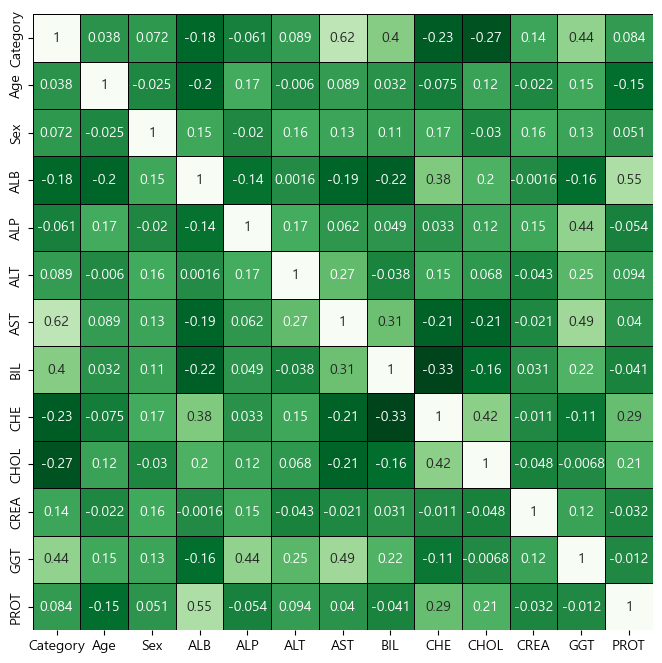

In [6]:
# 플롯 생성
fig, ax = plt.subplots(figsize=(8,8))  # figure 및 axes를 생성합니다. 크기는 8x8으로 지정됩니다.

# Heatmap 생성
sns.heatmap(df.corr(),                 # 데이터프레임의 상관관계를 히트맵으로 시각화합니다.
            annot=True,                # 각 셀에 숫자 값을 표시합니다.
            fmt='.2g',                 # 숫자 형식을 지정합니다.
            cmap="Greens_r",         # 색상 맵을 'Greens_r'로 설정하여 Green 계열의 반전 색상을 사용합니다.
            cbar=False,                # 컬러바를 표시하지 않습니다.
            linewidths=0.5,            # 셀 사이의 경계선 두께를 설정합니다.
            linecolor='black'          # 셀 사이의 경계선 색상을 검은색으로 설정합니다.
           )

In [7]:
import statsmodels.api as sm

# 독립변수와 종속변수 설정
X = df.drop(columns=['Category'])  # Category를 제외한 모든 열을 독립변수로 설정
Y = df['Category']  # Category를 종속변수로 설정

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 생성 및 적합
model = sm.OLS(Y, X)
results = model.fit()

# 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Category   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     59.68
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.62e-94
Time:                        17:36:14   Log-Likelihood:                 55.377
No. Observations:                 615   AIC:                            -84.75
Df Residuals:                     602   BIC:                            -27.27
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2472      0.140     -1.765      0.0

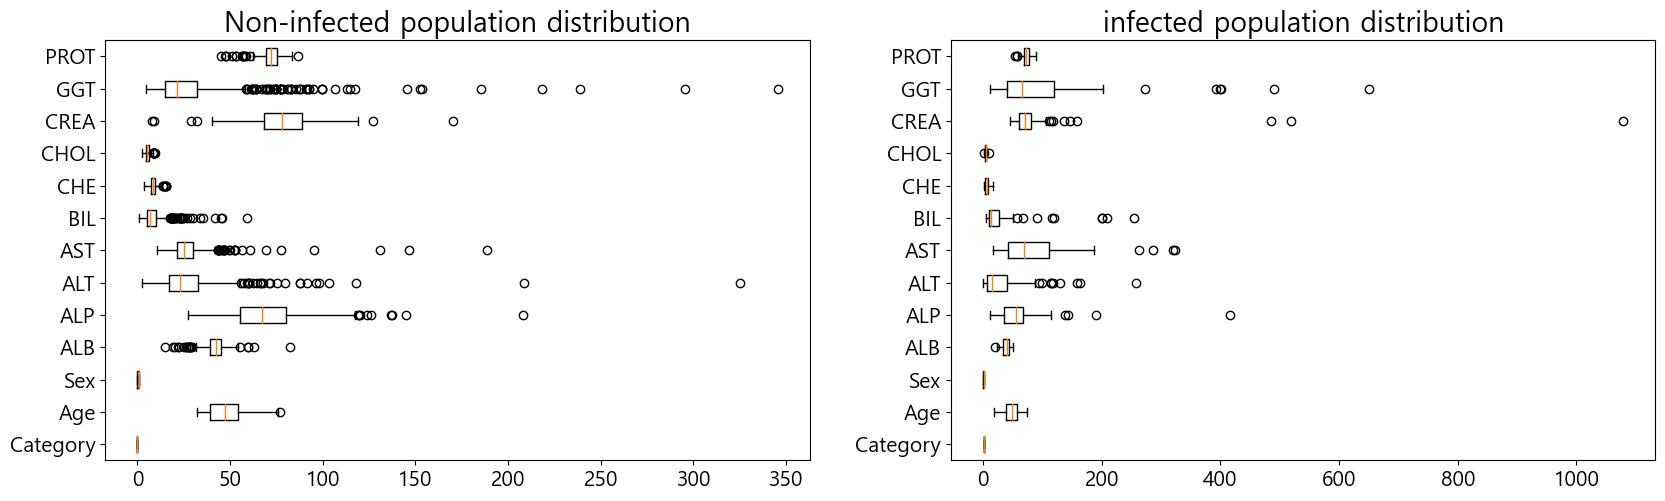

In [8]:
fig2 = plt.figure(figsize=(20,12))
ax1 = fig2.add_subplot(2,2,1)
ax2 = fig2.add_subplot(2,2,2)

ax1.set_title('Non-infected population distribution', fontsize=20)
ax2.set_title('infected population distribution', fontsize=20)

ax1.boxplot(x=df[df['Category']==0], labels=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'], vert=False)
ax2.boxplot(x=df[df['Category']==1], labels=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'], vert=False)
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

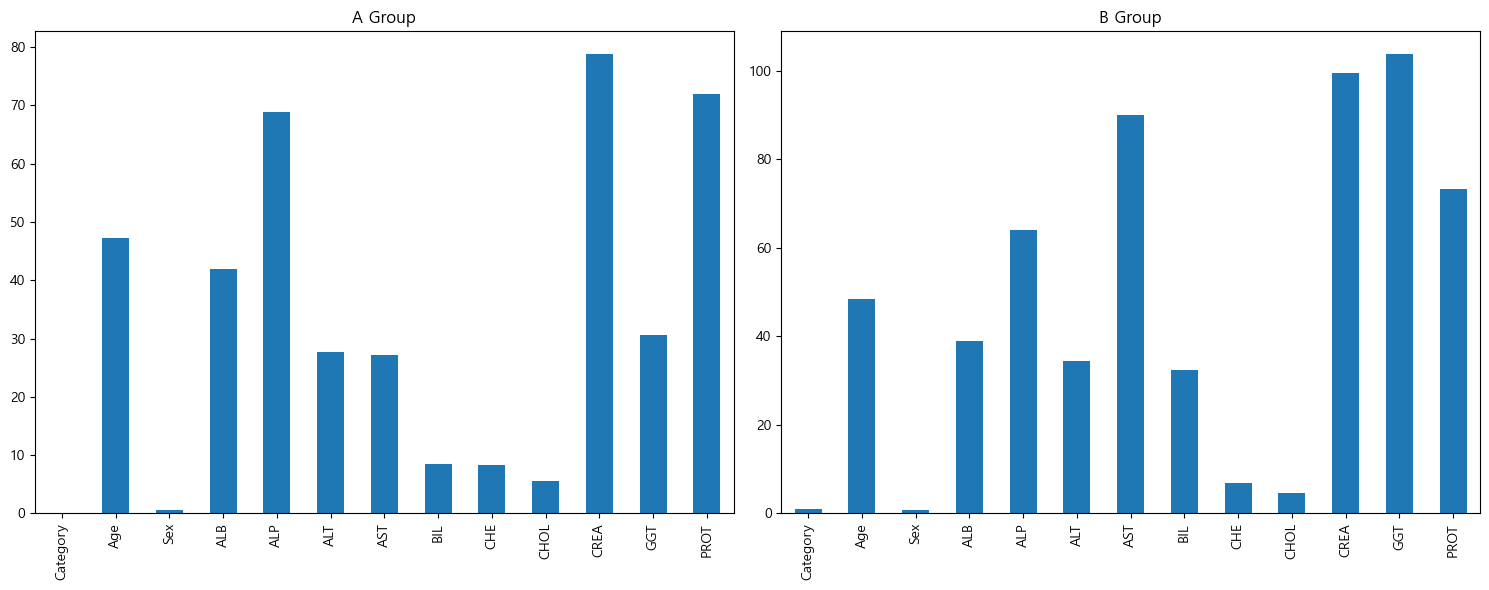

In [9]:
# 그림과 축 생성
fig3, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))  # 1행 2열의 그래프 공간을 만듭니다.

# 첫 번째 그래프 (그룹 0의 평균 값)
grp1 = grouped_df.get_group(0).mean()  # Category가 0인 그룹의 평균 값을 계산합니다.
grp1.plot(kind='bar',                  # 막대 그래프를 그립니다.
          width=0.5,                   # 막대의 너비를 설정합니다.
          ax=axes[0]                   # 첫 번째 축에 그래프를 그립니다.
         )
axes[0].set_title('A Group')      # 그래프 제목을 설정합니다.

# 두 번째 그래프 (그룹 1의 평균 값)
grp2 = grouped_df.get_group(1).mean()  # Category가 1인 그룹의 평균 값을 계산합니다.
grp2.plot(kind='bar',                  # 막대 그래프를 그립니다.
          width=0.5,                   # 막대의 너비를 설정합니다.
          ax=axes[1]                   # 두 번째 축에 그래프를 그립니다.
         )
axes[1].set_title('B Group')      # 그래프 제목을 설정합니다.

plt.tight_layout()  # 그래프들 간의 간격을 조정합니다.
plt.show()          # 그래프를 출력합니다.


In [10]:
# 데이터셋에서 입력 및 출력 데이터를 설정합니다.
x = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', \
        'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
y = df['Category']

# 입력 데이터를 표준화(Standardization)합니다.
x = preprocessing.StandardScaler().fit(x).transform(x)

# 학습용과 테스트용 데이터로 분리합니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

# KNN 분류기 모델을 생성하고 학습시킵니다.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# 테스트 데이터를 사용하여 예측합니다.
y_hat = knn.predict(x_test)

# Confusion Matrix를 출력합니다.
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

# Classification Report를 출력합니다.
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

[[219   3]
 [ 13  11]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       222
           1       0.79      0.46      0.58        24

    accuracy                           0.93       246
   macro avg       0.86      0.72      0.77       246
weighted avg       0.93      0.93      0.93       246



In [11]:
# 데이터셋에서 입력 및 출력 데이터를 설정합니다.
x = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',\
        'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
y = df['Category']

# 입력 데이터를 표준화(Standardization)합니다.
x = preprocessing.StandardScaler().fit(x).transform(x)

# 차수(degree) 범위 설정
degrees = [1, 2, 3, 4, 5]

# 각 차수에 따른 MSE 계산
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    
    # 모델 생성 및 학습
    model = LinearRegression()
    model.fit(x_poly, y)
    
    # 예측 및 MSE 계산
    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    
    print(f"Degree {degree} MSE: {mse}")

Degree 1 MSE: 0.048900580446412496
Degree 2 MSE: 0.021181663268069358
Degree 3 MSE: 0.0012287166094190735
Degree 4 MSE: 4.015395412376679e-26
Degree 5 MSE: 1.2787518278769458e-24
